<a href="https://colab.research.google.com/github/alvianfirdaus/PCVK_Ganjil_2023/blob/main/Week_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------
# **PERTEMUAN 5**
## **Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**
## **TI-3H**
---
**PROFIL MAHASISWA**<p>
Nama : Alvian Nur Firdaus<p>
Kelas : TI-3H<p>
Nim : 2141720022<p>
Wa : 081235026920<p>

<br>

--------------------------

## **F. TUGAS PRAKTIKUM**

### **1. Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


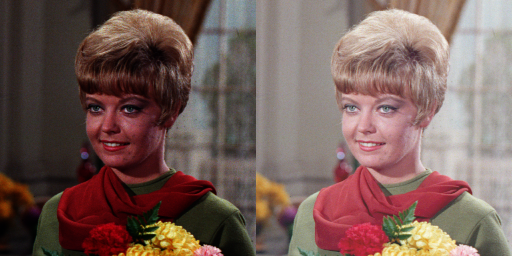

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

original =cv2.imread('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/female.tiff')
gamma_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c]=np.clip(255 * ((original[y,x,c]/255)**(1/gamma)) ,0,255)

final_frame=cv2.hconcat ((original,gamma_image))
cv2_imshow(final_frame)


Gambar diatas adalah citra yang diproses menggunakan Gamma Correction nilai gamma 3.

### **2. Buat Simulasi Image Depth**
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 2
7 = 128, dst<p>

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


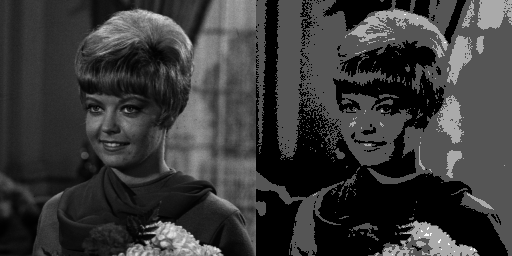

In [4]:

import cv2
import numpy as np

original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/female.tiff', cv2.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### **3. Buat modul Average Denoising**
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).


Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan Anda:


Nilai PSNR adalah 27.534351738762485 (dB)


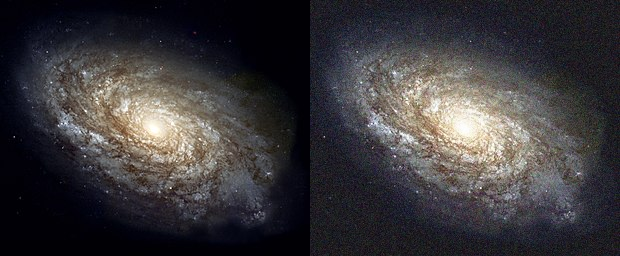

In [9]:
#No 3.1 (citra: 5)

import cv2 as cv
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE = 0 berarti tidak ada noise.
                  # Sedangkan PSNR tidak dibutuhkan.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR untuk Jumlah Citra di Average 5 adalah 27.539027629418243 (dB)


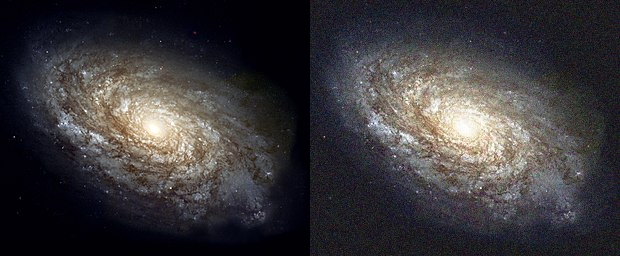



Nilai PSNR untuk Jumlah Citra di Average 10 adalah 27.55926951741688 (dB)


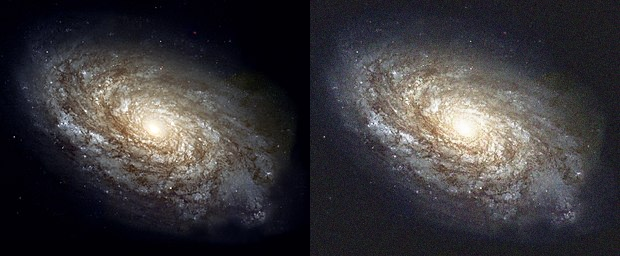



Nilai PSNR untuk Jumlah Citra di Average 20 adalah 27.54765059424733 (dB)


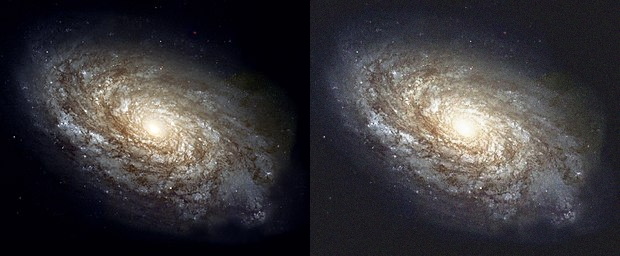



Nilai PSNR untuk Jumlah Citra di Average 40 adalah 27.51242019914448 (dB)


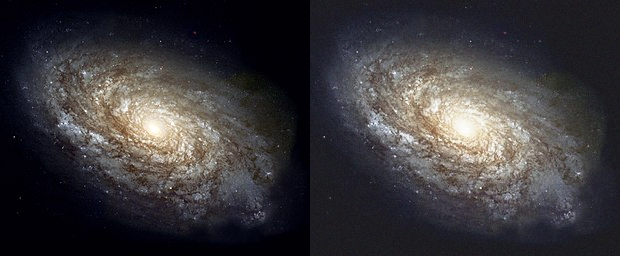



Nilai PSNR untuk Jumlah Citra di Average 80 adalah 27.513486005790952 (dB)


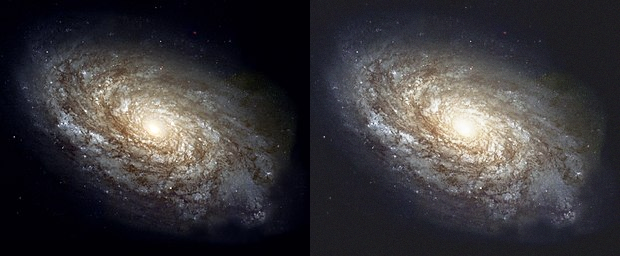



Nilai PSNR untuk Jumlah Citra di Average 100 adalah 27.51835397149739 (dB)


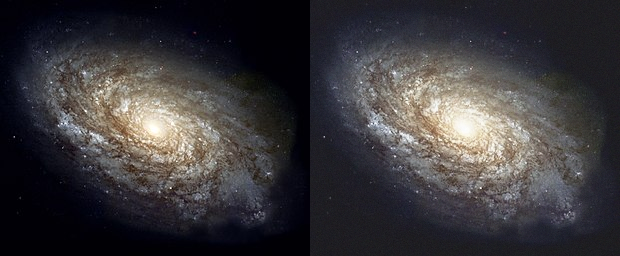

In [15]:
import cv2 as cv
import glob
from math import log10, sqrt
import numpy as np

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/galaxy.jpg')
cv_img = []

# Mengambil semua gambar dari folder noises
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/aset/Pertemuan5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar nilai noise_number yang ingin Anda gunakan
noise_numbers = [5, 10, 20, 40, 80, 100]

for i in noise_numbers:
    dst = cv_img[0]

    for j in range(1, i):
        alpha = 1.0 / j
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[j], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if(mse == 0):
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk Jumlah Citra di Average {i} adalah {psnr} (dB)')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)
    print('\n')

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.<p>

>menghitung nilai PSNR antara gambar asli (original) dan gambar hasil penggabungan (dst). Jika Nilai PSNR yang tinggi menunjukkan bahwa gambar hasil penggabungan (dst) memiliki kualitas yang sangat baik dan memiliki kemiripan yang tinggi dengan gambar asli (original). Sedangkan Nilai PSNR yang rendah menunjukkan bahwa gambar hasil penggabungan (dst) memiliki kualitas yang buruk dan memiliki perbedaan yang signifikan dengan gambar asli (original).


### **4. Buat image masking untuk image berikut.**
Image kiri adalah image asli (image KTP),sedangkan image paling kanan adalah hasilnya:

## **Gambar 1 Kelompok 1 dan 2**

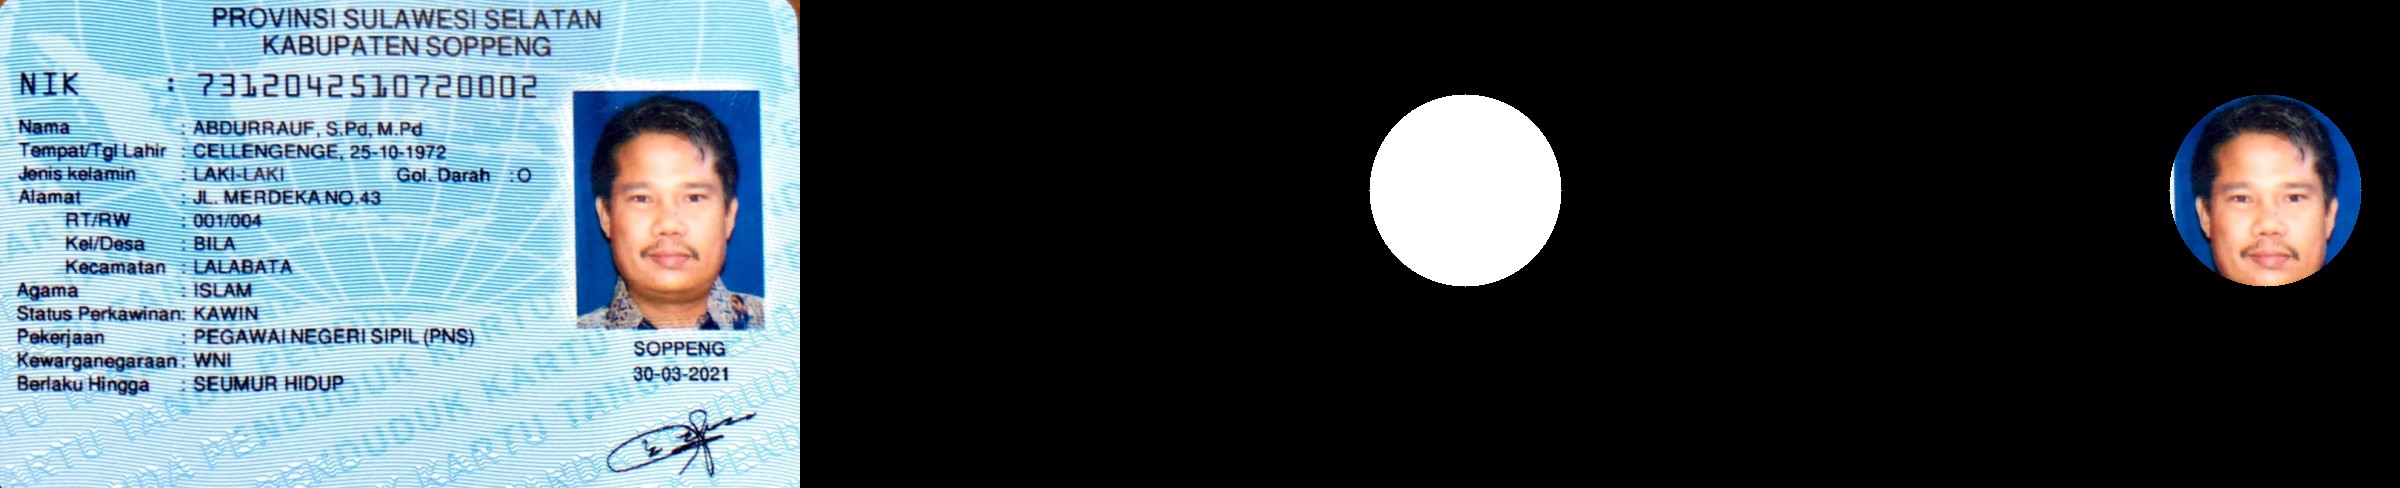

In [18]:
#Gambar 1 kelompok 1

path='/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
original_image = cv2.imread(path)
mask = np.zeros_like(original_image)

center1 = (665, 190)
radius1 = 96

cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(original_image, mask)


final_frame = cv2.hconcat((original_image,mask,masked_image))
cv2_imshow(final_frame)

### **5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.**
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu



### **Not Komplement**

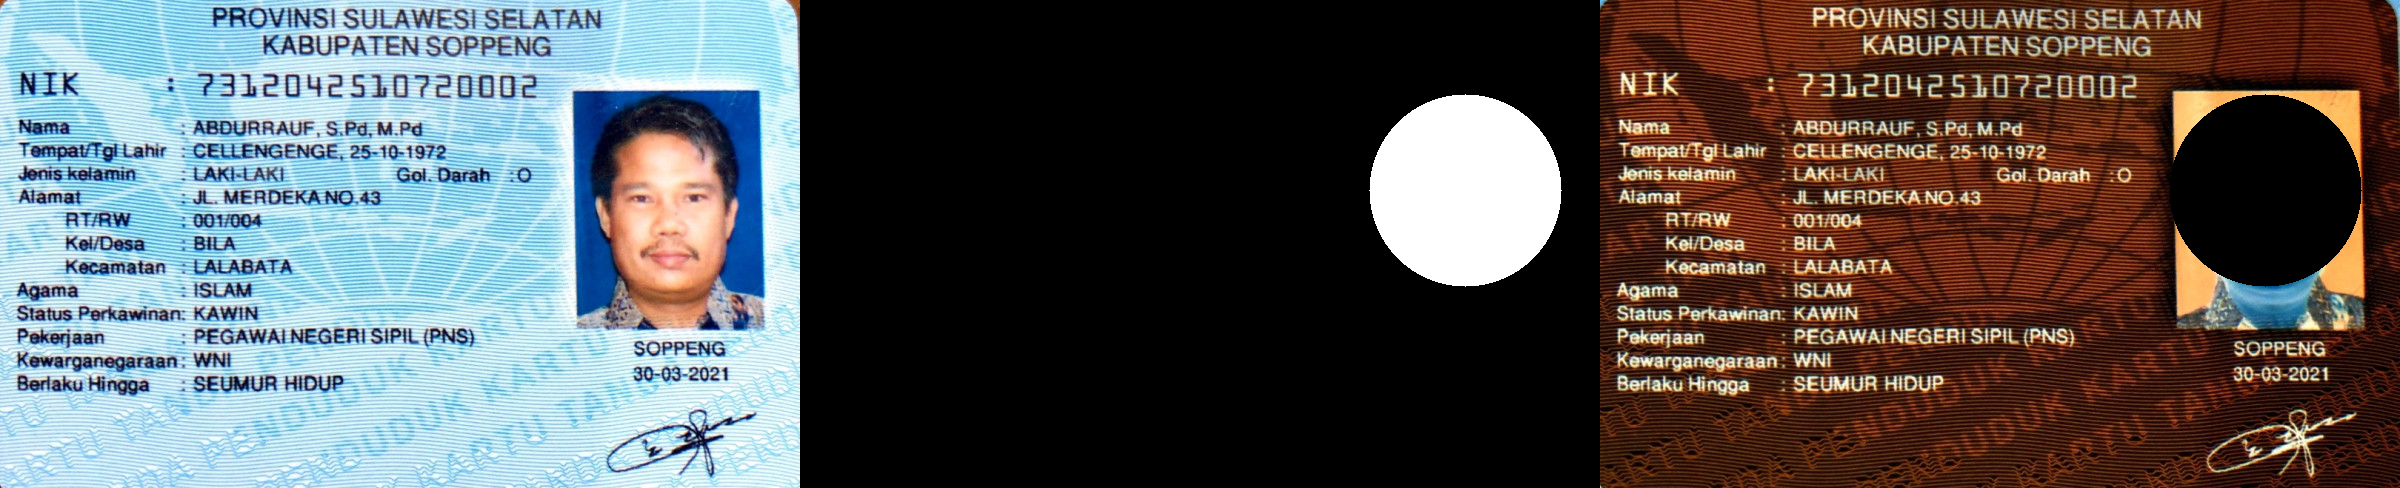

In [39]:
path= cv2.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

mask = np.zeros(path.shape, dtype=np.uint8)
mask = cv.circle(mask, (665,190), 96, (255,255,255), -1)

result = ~path & ~mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((path, mask, result))
cv2_imshow(org_frame)

### **OR (Atau)**

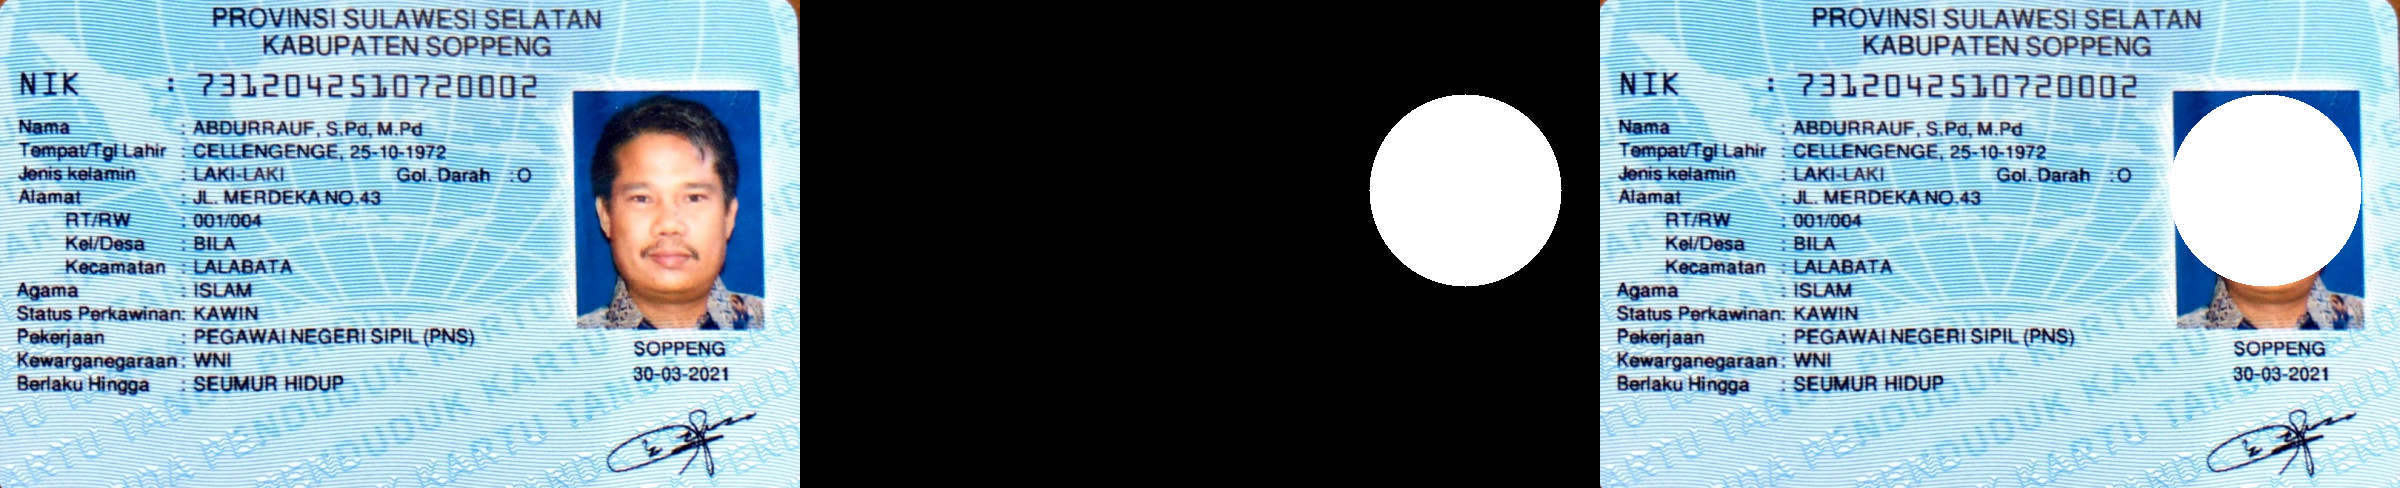

In [40]:
path= cv2.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

mask = np.zeros(path.shape, dtype=np.uint8)
mask = cv.circle(mask, (665,190), 96, (255,255,255), -1)

result = path | mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((path, mask, result))
cv2_imshow(org_frame)

### **AND (Dan)**

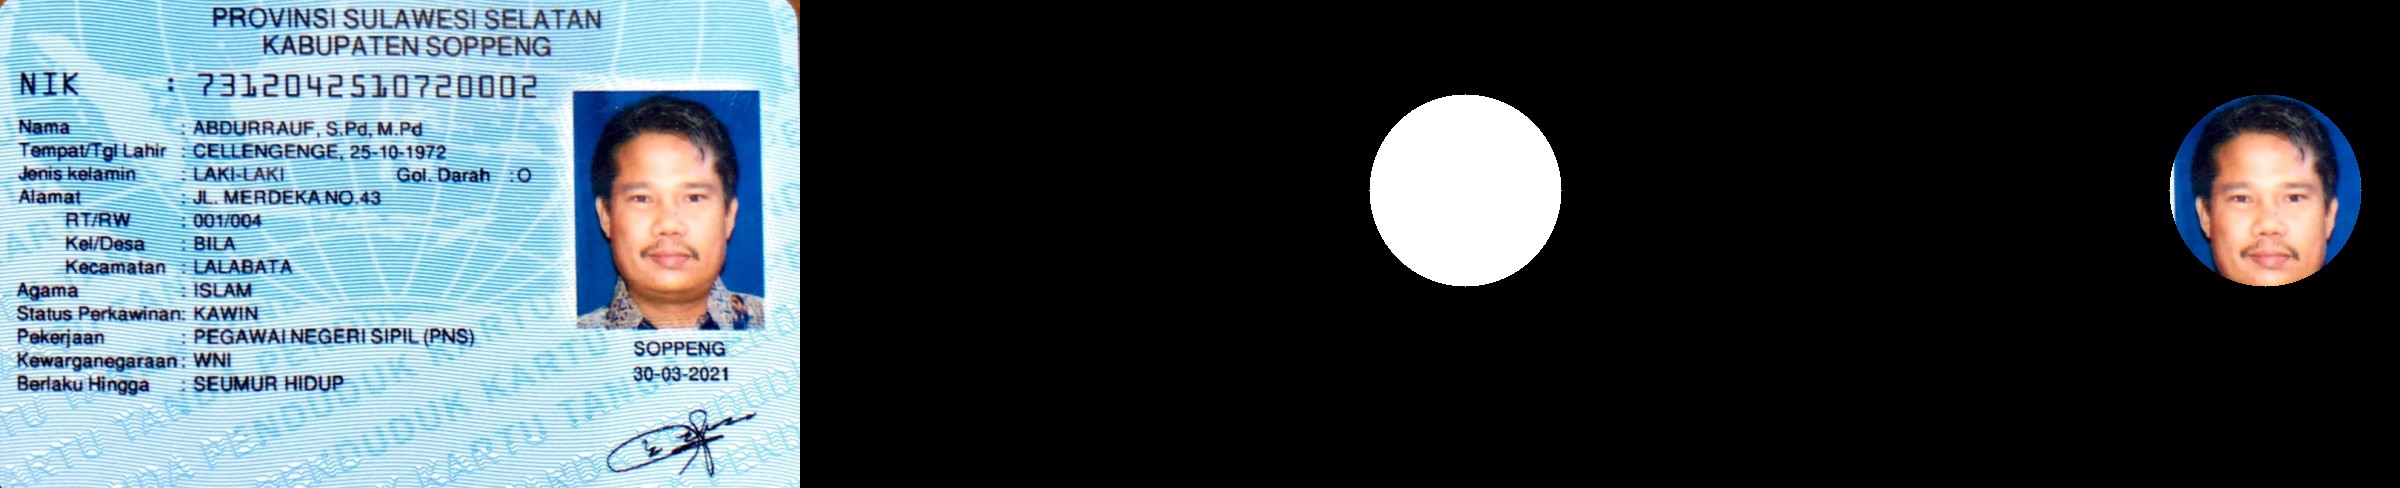

In [42]:
path= cv2.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

mask = np.zeros(path.shape, dtype=np.uint8)
mask = cv.circle(mask, (665,190), 96, (255,255,255), -1)

result = path & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((path, mask, result))
cv2_imshow(org_frame)

### **NAND (Not And)**

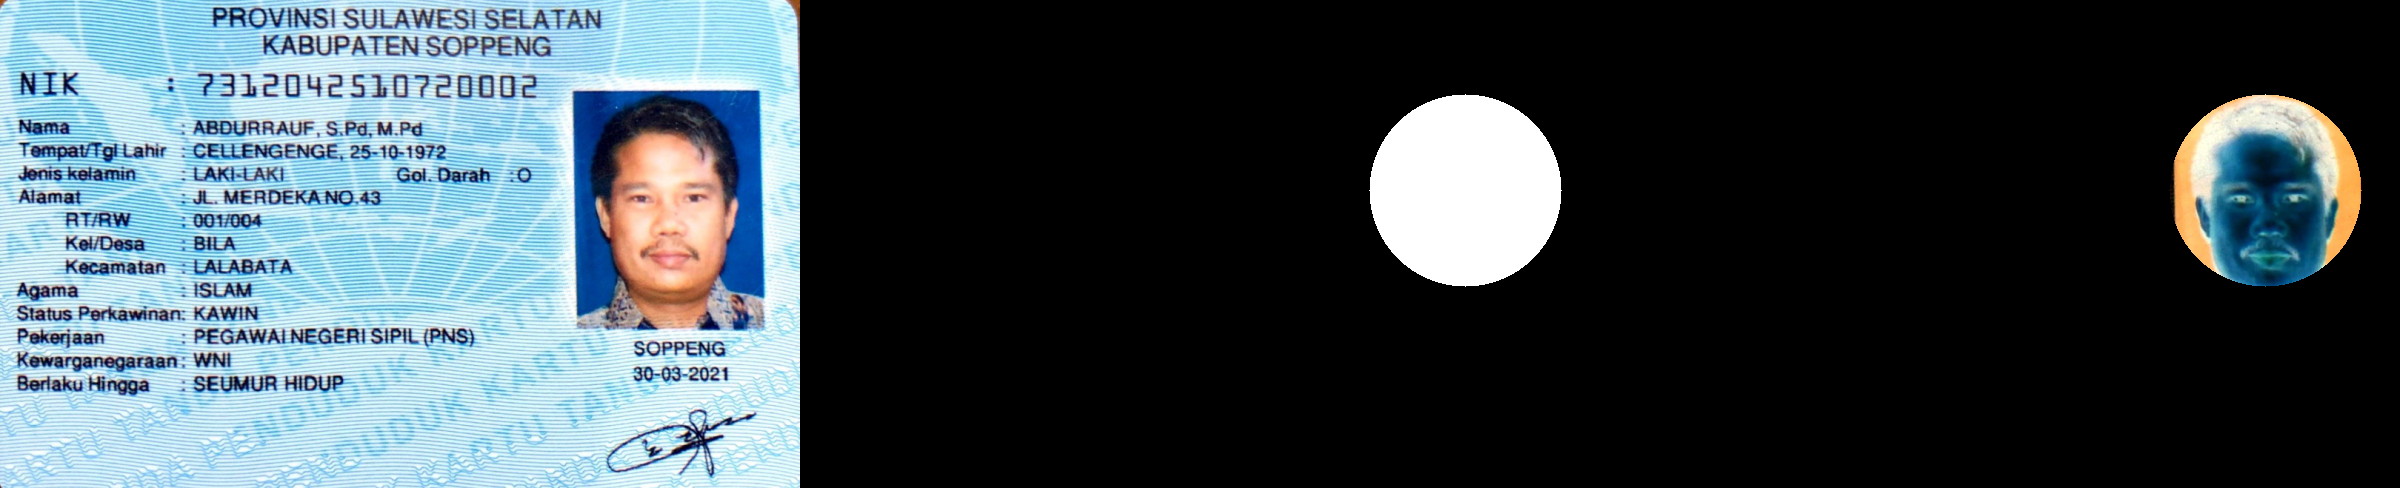

In [43]:
path= cv2.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

mask = np.zeros(path.shape, dtype=np.uint8)
mask = cv.circle(mask, (665,190), 96, (255,255,255), -1)

result = ~path & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((path, mask, result))
cv2_imshow(org_frame)

## **XOR(Exlusive Or)**

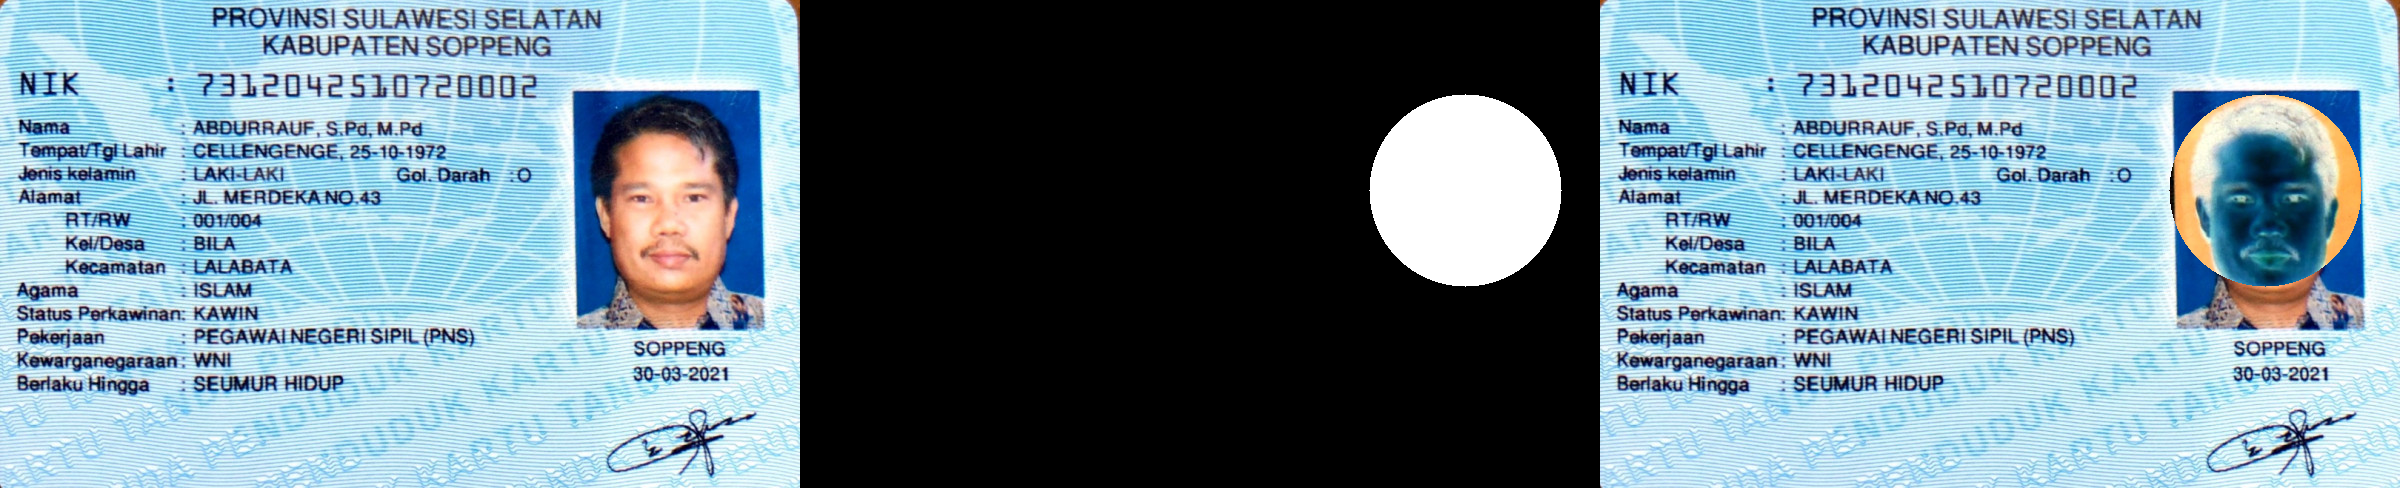

In [45]:
path= cv2.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

mask = np.zeros(path.shape, dtype=np.uint8)
mask = cv.circle(mask, (665,190), 96, (255,255,255), -1)

result = cv.bitwise_xor(path, mask)
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((path, mask, result))
cv2_imshow(org_frame)

### **Tuliskan hasil analisa anda:**<p>

Dengan melakukan masking seperti gambar diatas, kita dapat mengisolasi area tertentu pada gambar asli yang sesuai dengan lingkaran yang telah ditentukan. Area ini akan tetap terlihat pada gambar hasil (masked), sedangkan area di luar lingkaran akan menjadi hitam dan juga dapat menghapus atau menggantikan latar belakang gambar. Sehingga hasil masking ini dapat digunakan untuk memisahkan objek dari latar belakang sehingga Anda dapat menggantikannya dengan latar belakang yang berbeda.